In [1]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, Markdown

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## a) Effect of curvature on laminar thickness before and after smoothing

In [2]:
curv_map = surfaces.CurvatureMap(downsampled=True)

/home/asaberi/laminar_organization/code/figures/../datasets.py:387: RuntimeWarning: invalid value encountered in divide
  laminar_thickness[hem] /= laminar_thickness[hem].sum(axis=1, keepdims=True)


Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900


<AxesSubplot: >

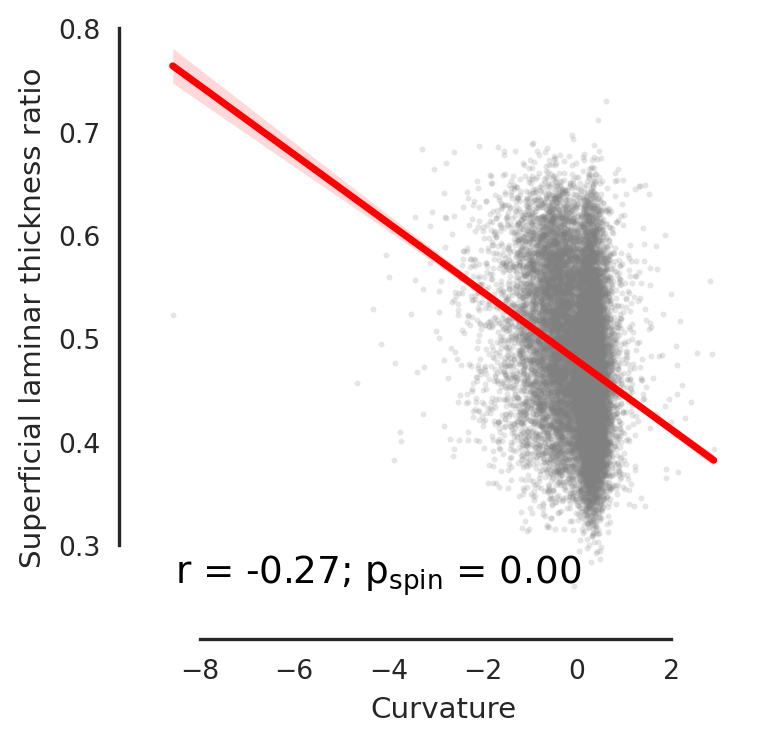

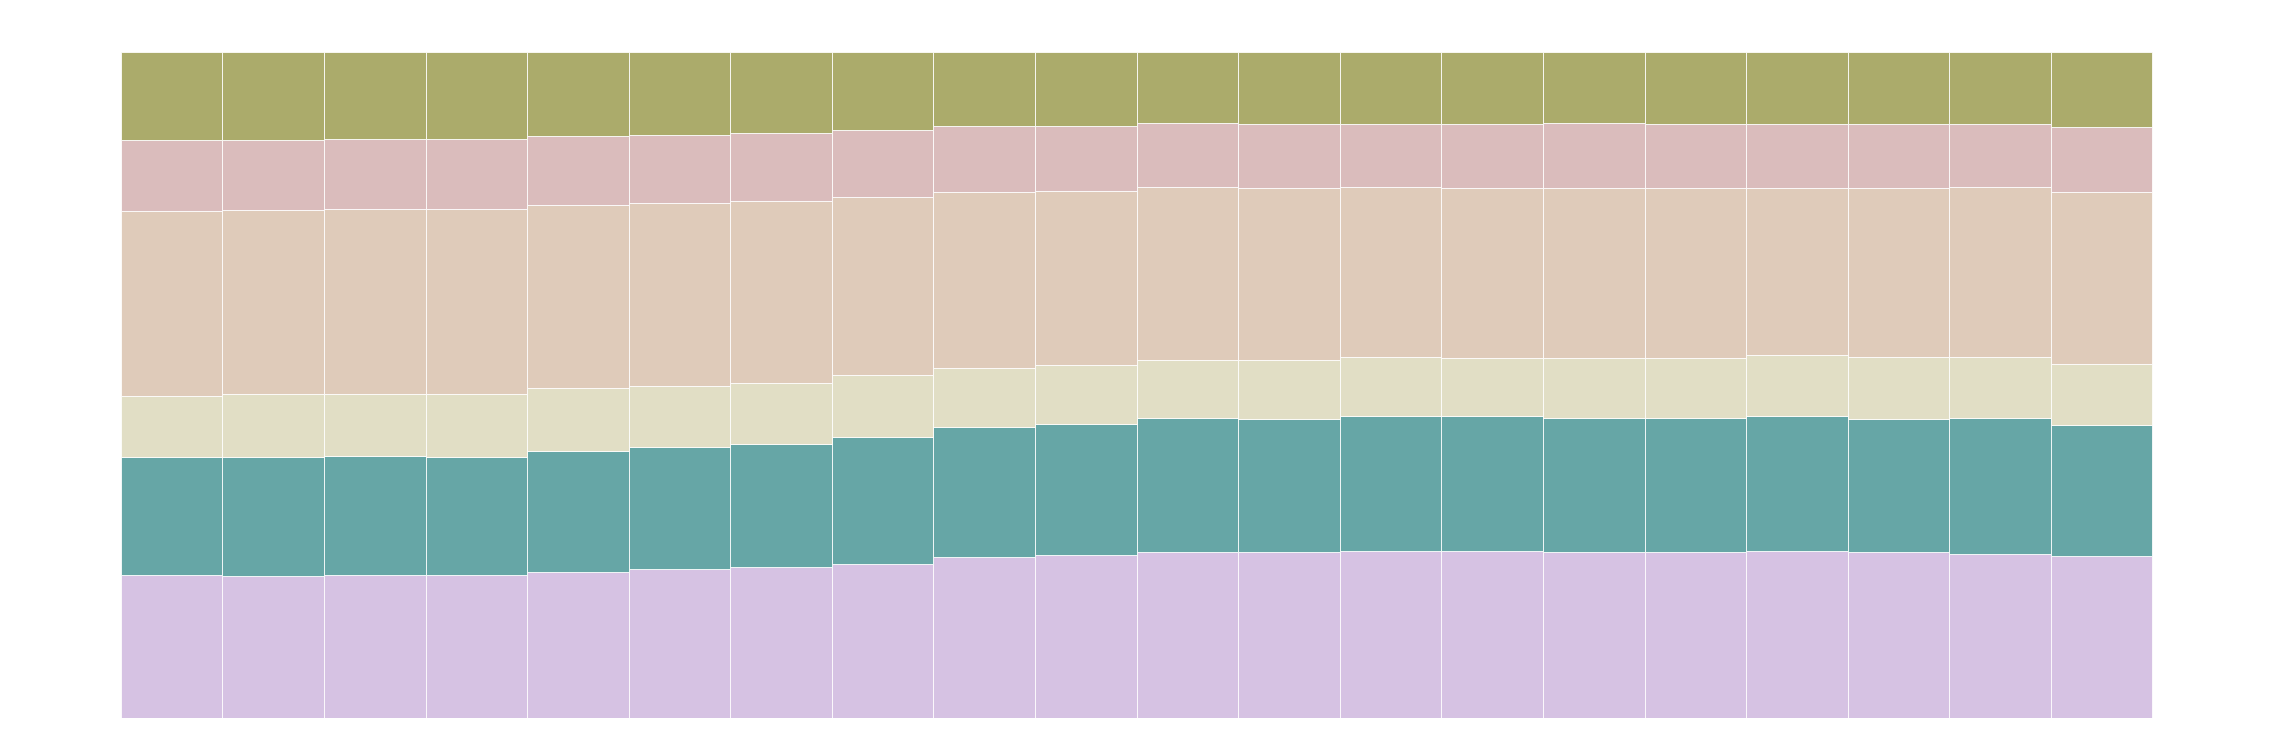

In [3]:
curv_map.effect_on_laminar_thickness(correct_curvature=None)

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900


<AxesSubplot: >

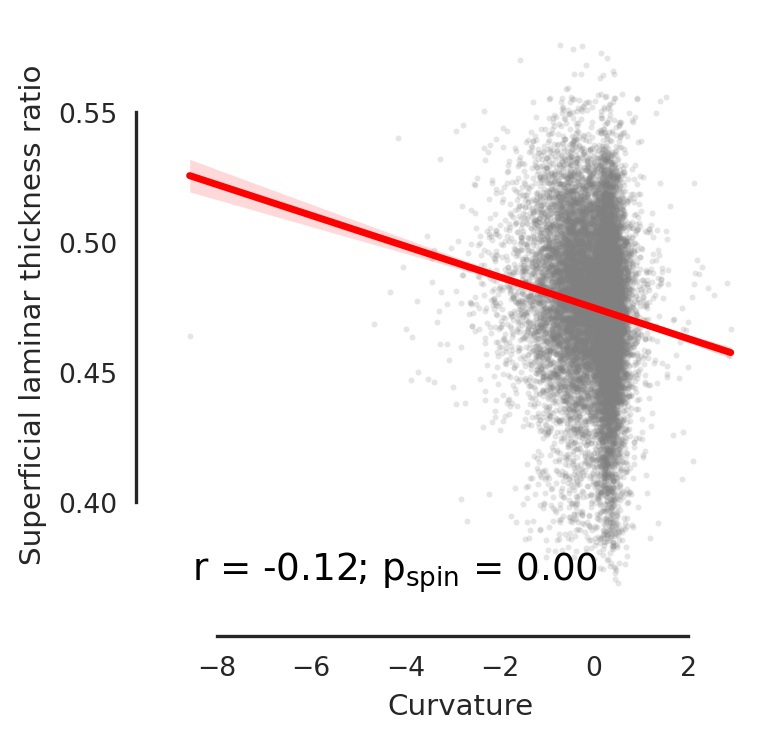

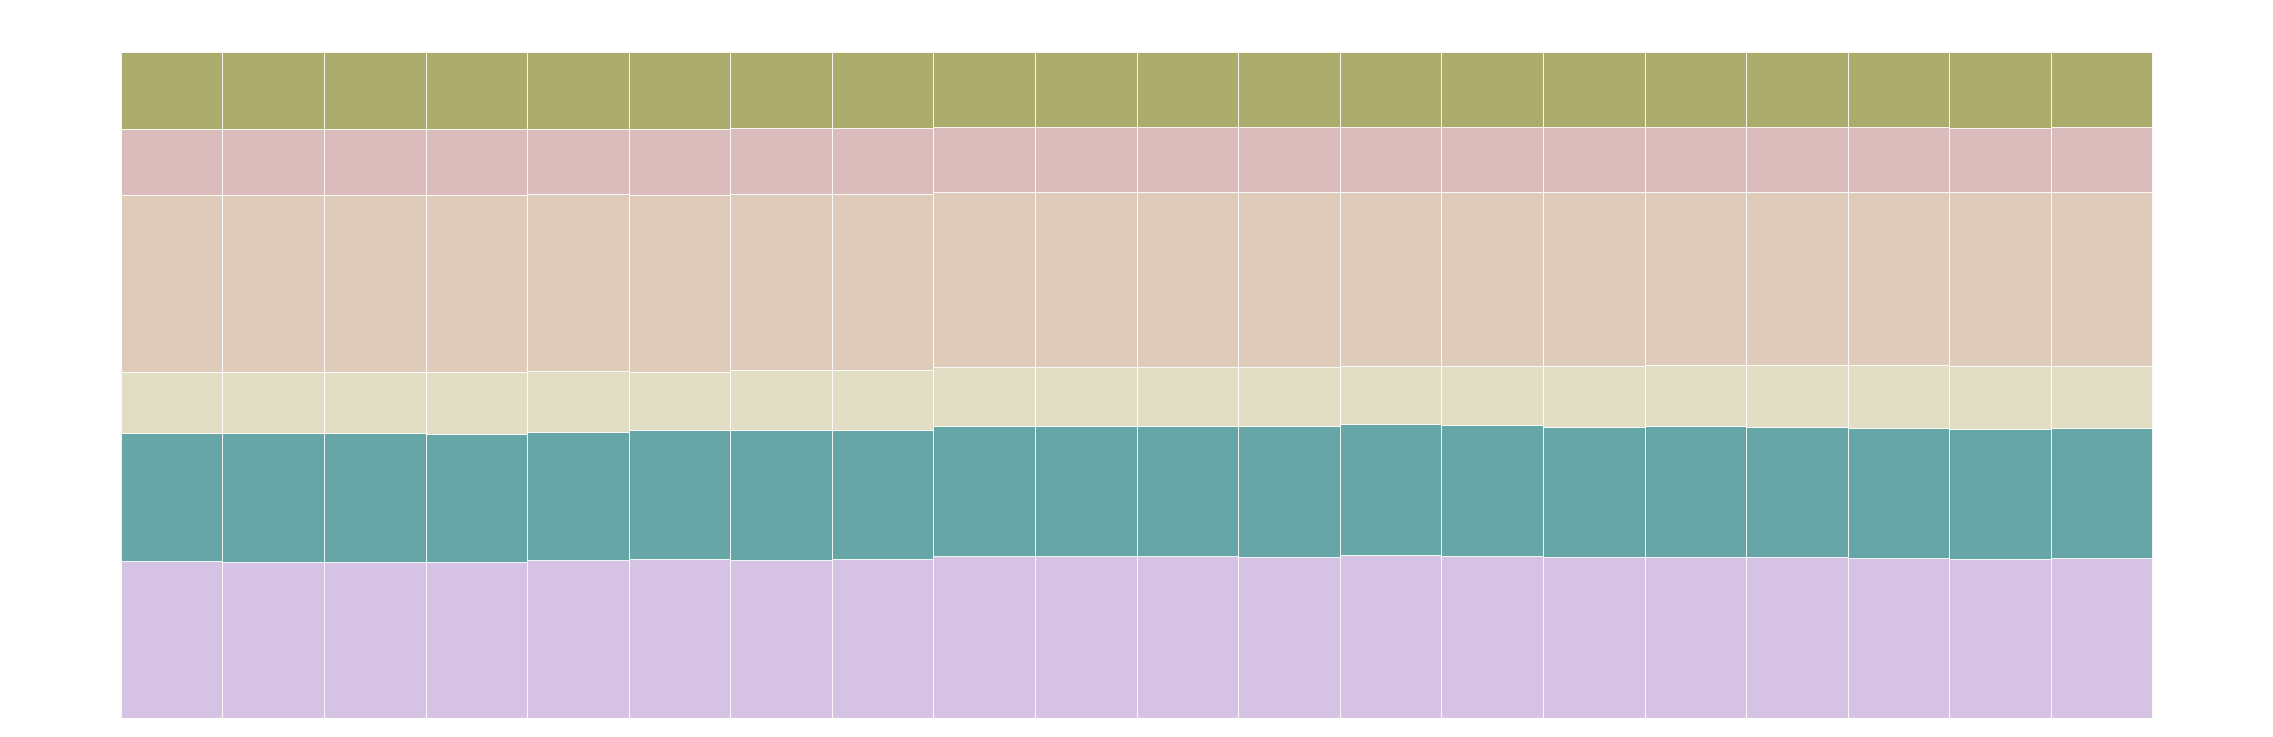

In [4]:
curv_map.effect_on_laminar_thickness(correct_curvature='smooth-10')

## b) Association of curvature similarity and laminar thickness covariance before and after smoothing

Warning: This will take a lot of time and resources!

In [5]:
curv_sim = matrices.CurvatureSimilarityMatrix('sjh', exc_regions='adysgranular')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/curvature/curvature_similarity_matrix_parc-sjh.npz


In [6]:
ltc_smooth = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh', correct_curvature='smooth-10')
ltc_none = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh', correct_curvature=None)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-none_exc-adysgranular_metric-parcor/matrix.npz


Pearson correlation with Curvature similarity
Coef: 0.1298283326859479; p-value (spin): 0.0


(0.1298283326859479, 0.0)

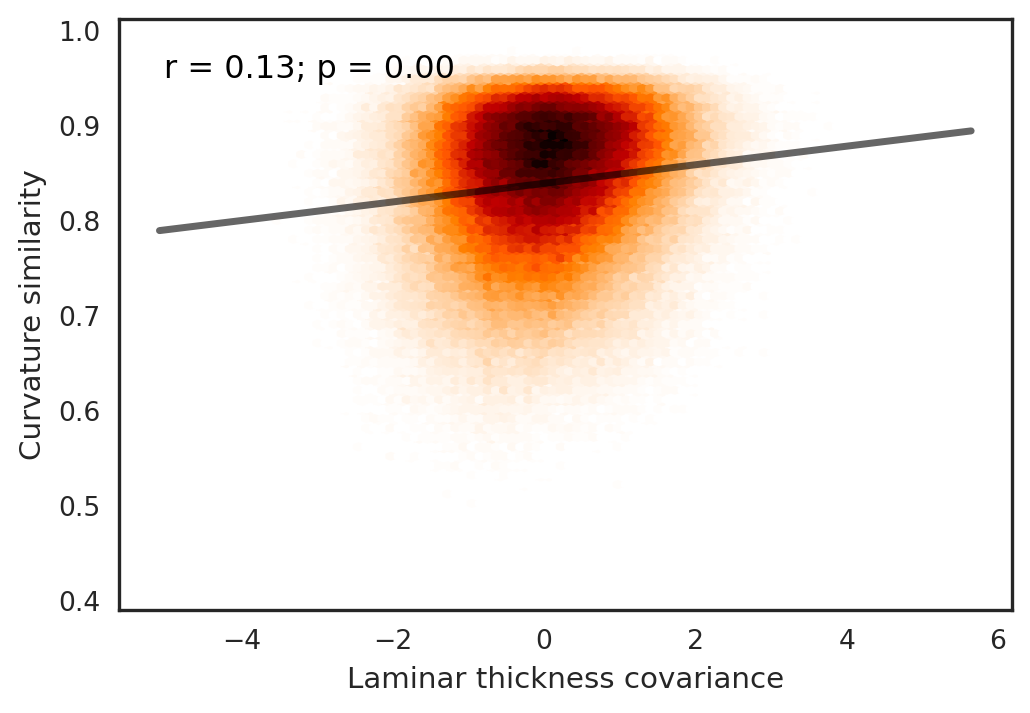

In [7]:
ltc_none.correlate_edge_wise(curv_sim)

Pearson correlation with Curvature similarity
Coef: 0.04370672687976325; p-value (spin): 0.0


(0.04370672687976325, 0.0)

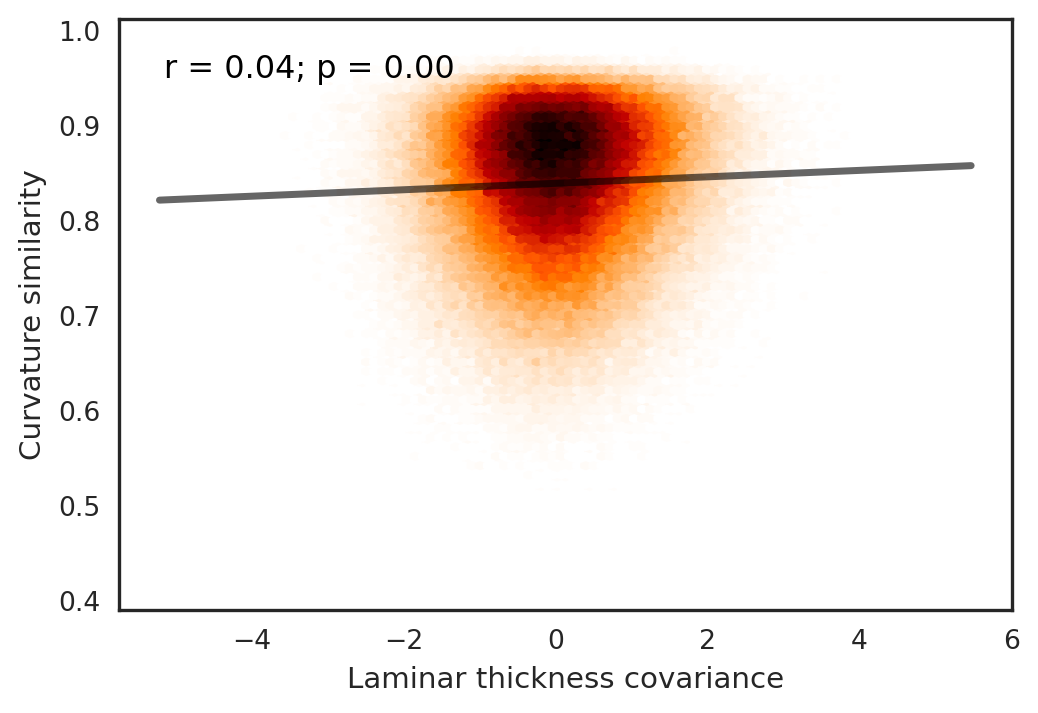

In [8]:
ltc_smooth.correlate_edge_wise(curv_sim)

## c) Association of LTC G1 with curvature map before and after smoothing

Curvature map:

In [9]:
curv_map_ico7 = surfaces.CurvatureMap(downsampled=False).surf_data
midline = datasets.load_parcellation_map('sjh', True, downsampled=False) == 0
curv_map_ico7[midline] = np.NaN

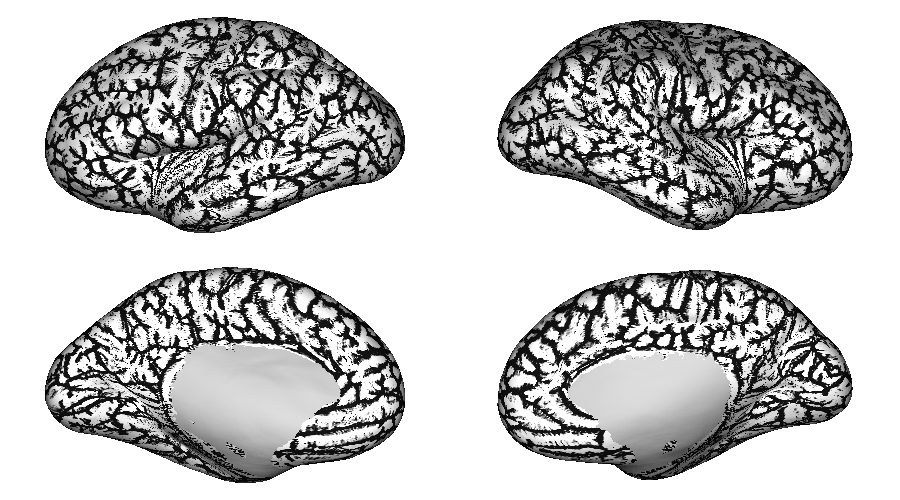

In [10]:
helpers.plot_surface(curv_map_ico7, plot_downsampled=False, vrange=(-0.25, 0.25), cmap='Greys', layout_style='grid')

In [11]:
ltcg_smooth = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh'))
ltcg_none = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh', correct_curvature=None))

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-none_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-none_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Lo

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900


(             LTC G1
 Curvature -0.137683,
            LTC G1
 Curvature     0.0)

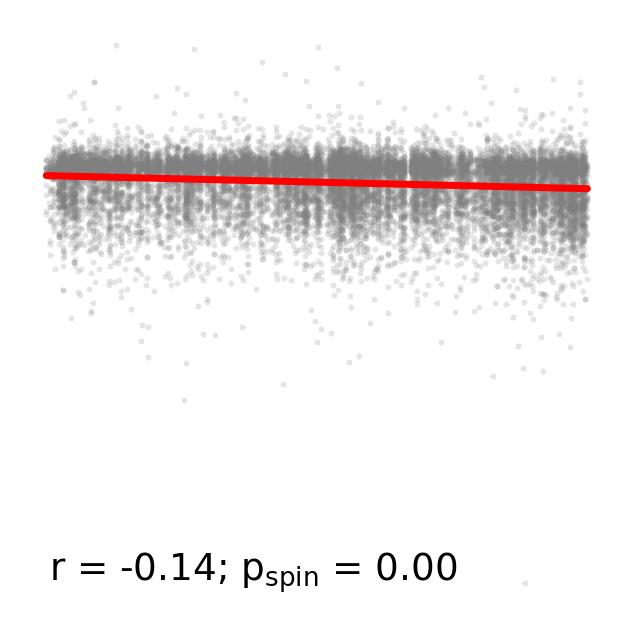

In [12]:
ltcg_none.correlate(curv_map, parcellated=False, n_perm=1000, x_columns=['LTC G1'], axis_off=True)

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900


(            LTC G1
 Curvature -0.06447,
            LTC G1
 Curvature     0.0)

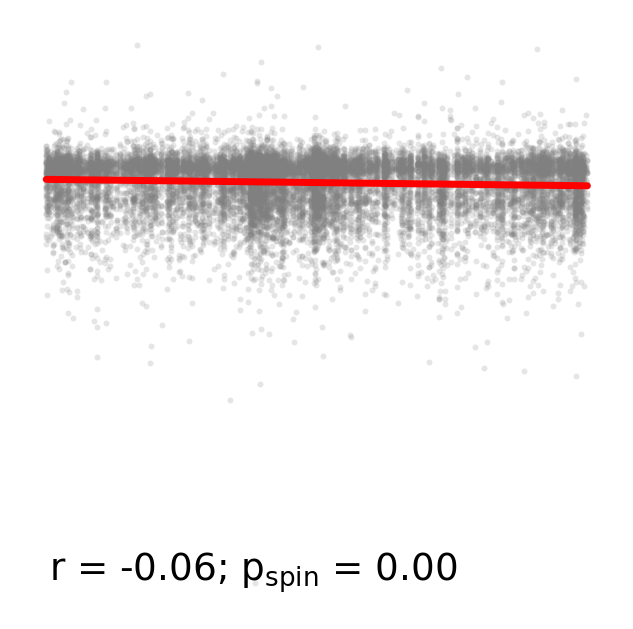

In [13]:
ltcg_smooth.correlate(curv_map, parcellated=False, n_perm=1000, x_columns=['LTC G1'], axis_off=True)